In [1]:
import os
os.chdir('../../')

import DeepPurpose.DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *
import Processing.dataset_filter as processors

if not os.path.exists('./result/DeepDTA'):
    os.makedirs('./result/DeepDTA')

In [2]:
df = pd.read_csv('./data/r3/title_r3_20k.csv', sep = ',', error_bad_lines=False)
X_drug, X_target, y = df['Drug'].values, df['Target'].values, df['Label'].values

drug_encoding = 'CNN'
target_encoding = 'CNN'
train, val, test = data_process(X_drug, X_target, y,
                                drug_encoding, target_encoding,
                                split_method='random',frac=[0.7,0.1,0.2])

# use the parameters setting provided in the paper: https://arxiv.org/abs/1801.10193
config = generate_config(drug_encoding = drug_encoding,
                         target_encoding = target_encoding,
                         cls_hidden_dims = [1024,1024,512],
                         train_epoch = 100,
                         LR = 0.001,
                         batch_size = 256,
                         cnn_drug_filters = [32,64,96],
                         cnn_target_filters = [32,64,96],
                         cnn_drug_kernels = [4,6,8],
                         cnn_target_kernels = [4,8,12]
                         )


Drug Target Interaction Prediction Mode...
in total: 20000 drug-target pairs
encoding drug...
unique drugs: 18585
encoding protein...
unique target sequence: 1870
splitting dataset...
Done.


Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 52.5634. Total time 0.00027 hours
Validation at Epoch 1 with loss:2.64336, MSE: 2.34975 , Pearson Correlation: 0.17443 with p-value: 3.95E-15 , Concordance Index: 0.54693
Training at Epoch 2 iteration 0 with loss 2.44425. Total time 0.01666 hours
Validation at Epoch 2 with loss:2.18772, MSE: 2.07057 , Pearson Correlation: 0.27700 with p-value: 1.47E-36 , Concordance Index: 0.57935
Training at Epoch 3 iteration 0 with loss 1.93936. Total time 0.0375 hours
Validation at Epoch 3 with loss:2.09358, MSE: 2.03344 , Pearson Correlation: 0.33312 with p-value: 4.95E-53 , Concordance Index: 0.59996
Training at Epoch 4 iteration 0 with loss 1.87488. Total time 0.05944 hours
Validation at Epoch 4 with loss:2.48305, MSE: 1.97993 , Pearson Correlation: 0.29575 with p-value: 1.16E-41 , Concordance Index: 0.59288
Training at Epoch 5 iteration 0 with loss 2.16163. Total time 0.08777 hours
Validat

Training at Epoch 39 iteration 0 with loss 0.42942. Total time 0.86833 hours
Validation at Epoch 39 with loss:1.53344, MSE: 1.73987 , Pearson Correlation: 0.54527 with p-value: 2.64E-155 , Concordance Index: 0.68108
Training at Epoch 40 iteration 0 with loss 0.49212. Total time 0.88472 hours
Validation at Epoch 40 with loss:1.93922, MSE: 1.79899 , Pearson Correlation: 0.54588 with p-value: 1.02E-155 , Concordance Index: 0.68069
Training at Epoch 41 iteration 0 with loss 0.57783. Total time 0.90194 hours
Validation at Epoch 41 with loss:1.54958, MSE: 1.66241 , Pearson Correlation: 0.54114 with p-value: 1.55E-152 , Concordance Index: 0.68005
Training at Epoch 42 iteration 0 with loss 0.40526. Total time 0.91944 hours
Validation at Epoch 42 with loss:1.75184, MSE: 1.78419 , Pearson Correlation: 0.55420 with p-value: 2.03E-161 , Concordance Index: 0.68535
Training at Epoch 43 iteration 0 with loss 0.64638. Total time 0.93666 hours
Validation at Epoch 43 with loss:2.22735, MSE: 1.96790 , Pe

Training at Epoch 77 iteration 0 with loss 0.32049. Total time 1.50333 hours
Validation at Epoch 77 with loss:1.58649, MSE: 1.84425 , Pearson Correlation: 0.51823 with p-value: 7.05E-138 , Concordance Index: 0.67396
Training at Epoch 78 iteration 0 with loss 0.23350. Total time 1.52083 hours
Validation at Epoch 78 with loss:1.88537, MSE: 1.79337 , Pearson Correlation: 0.52343 with p-value: 4.17E-141 , Concordance Index: 0.67453
Training at Epoch 79 iteration 0 with loss 0.19797. Total time 1.53805 hours
Validation at Epoch 79 with loss:1.74002, MSE: 1.89377 , Pearson Correlation: 0.51101 with p-value: 1.72E-133 , Concordance Index: 0.67081
Training at Epoch 80 iteration 0 with loss 0.24412. Total time 1.55444 hours
Validation at Epoch 80 with loss:1.79996, MSE: 1.84291 , Pearson Correlation: 0.51765 with p-value: 1.60E-137 , Concordance Index: 0.67290
Training at Epoch 81 iteration 0 with loss 0.27761. Total time 1.57166 hours
Validation at Epoch 81 with loss:1.81958, MSE: 1.87019 , Pe

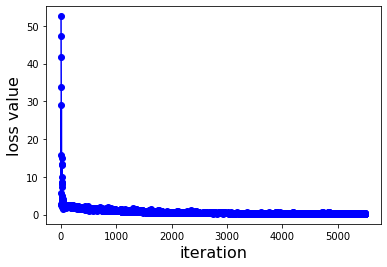

In [3]:
model = models.model_initialize(**config)
model.train(train, val, test)

In [4]:
model.save_model('./result/DeepDTA/r3/model_r3_20k_100epochs')